In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib.patches as patches

from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from sklearn.neighbors import NearestNeighbors

import torch
from torch import nn
from torch import optim

import cv2
import os
from PIL import Image

In [42]:
plt.rcParams['image.cmap'] = 'gray'

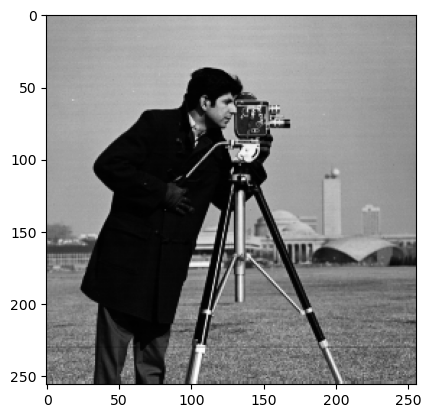

In [43]:
img = cv2.cvtColor(cv2.imread('cameraman.tif'), cv2.COLOR_RGB2GRAY)
plt.imshow(img)

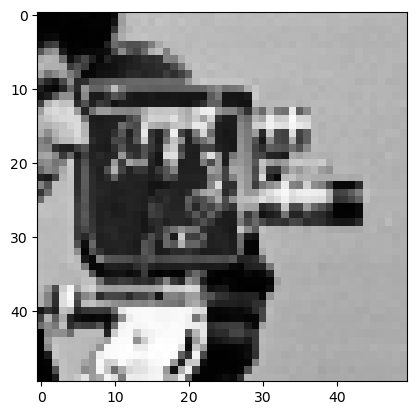

In [44]:
subimg = img[50:100,125:175]
plt.imshow(subimg)

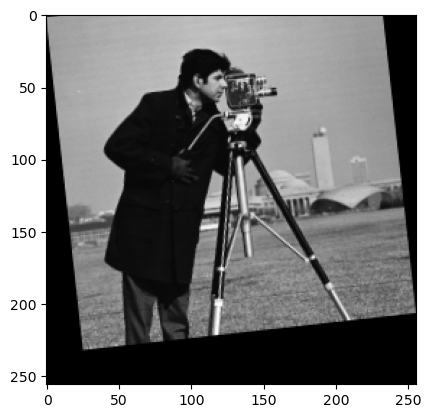

In [47]:
M = np.float32([
    [0.9, 0.1, 0],
    [-0.1, 0.9, 2]
])
rows,cols = img.shape
img2 = cv2.warpAffine(img,M,(rows,cols))
plt.imshow(img2)

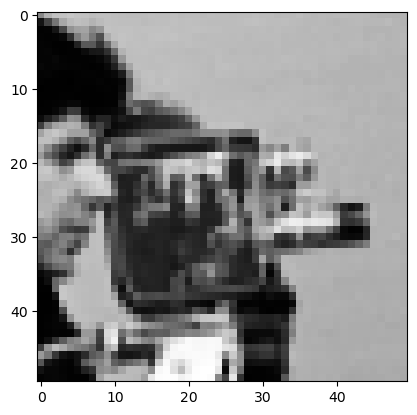

In [48]:
subimg = img2[25:75, 115:165]
plt.imshow(subimg)

In [57]:
def find1(image, subimage):
    corr = sp.signal.correlate2d(image, subimage, 'valid')
    return corr, np.argmax(corr) 


In [58]:
corr, idx = find1(img, subimg)

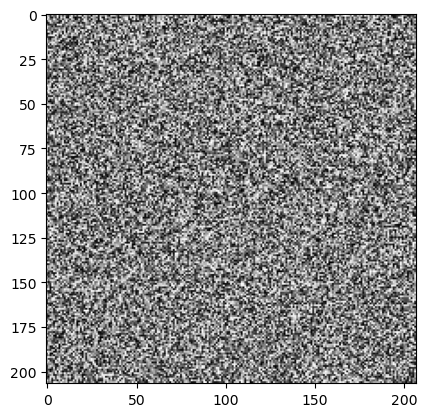

In [59]:
plt.imshow(corr)

In [95]:
corr = cv2.matchTemplate(img, subimg, cv2.TM_CCORR_NORMED)

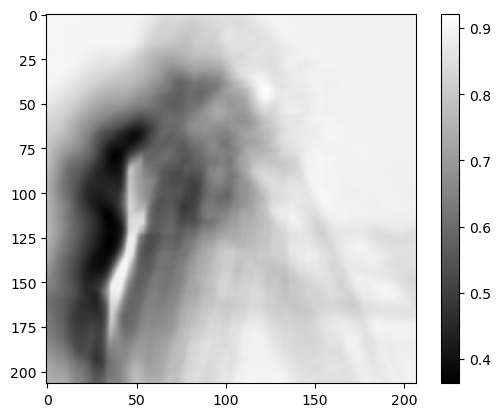

In [96]:
plt.imshow(corr)
plt.colorbar()

Best point:  (43, 122)


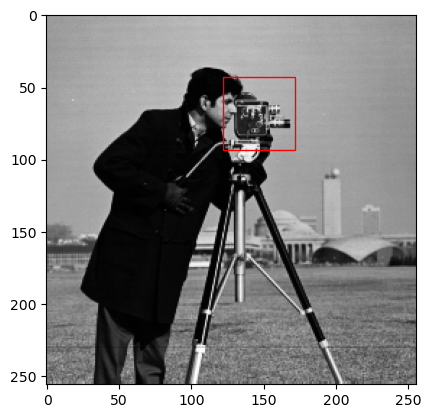

In [97]:
best_point = np.unravel_index(np.argmax(corr), corr.shape)
print("Best point: ", best_point)
plt.imshow(img)
rect = patches.Rectangle(
    (best_point[1], best_point[0]),
    50, 50, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

Отримали саме те, що шукали!